In [1070]:
import pandas as pd
import numpy as np
import seaborn as sns

In [1071]:
df1=pd.read_csv('loan.csv')
test=pd.read_csv('test.csv')

In [1072]:
df1.head()
df1=df1.drop('Loan_ID',axis=1)

In [1073]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


C:\Users\Nidhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

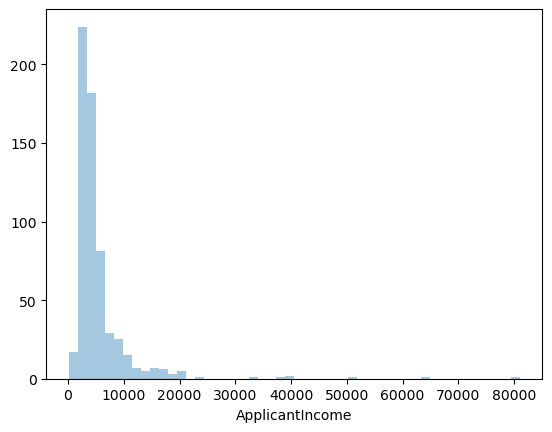

In [1074]:
sns.distplot(df1.ApplicantIncome,kde=False) #dependency hai

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

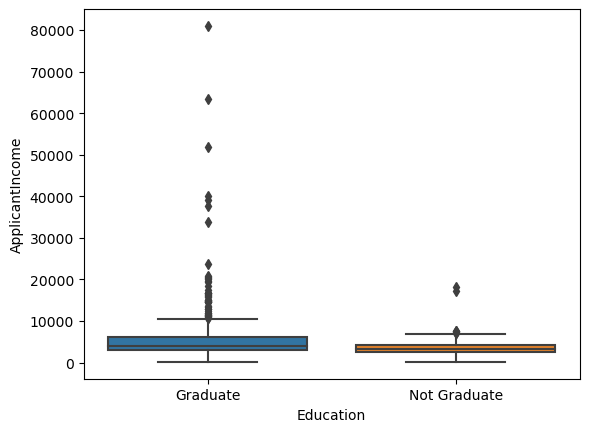

In [1075]:
# education and applicant income ka relation
sns.boxplot(x='Education',y='ApplicantIncome',data=df1)
#graduates have higher income

In [1076]:
df1['Loan_Status']=df1['Loan_Status'].apply(lambda x:0 if x=='N'else 1)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [1077]:
#to check if loan approval depends on credit history
df1.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [1078]:
df1.isnull().sum() 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1079]:
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0]) #fill empty gender values by most repetitive
df1['Gender']=df1['Gender'].apply(lambda x:0 if x=='Male'else 1)
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])

In [1080]:
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])

In [1081]:
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].apply(lambda x:0 if x=='N'else 1)
df1['Married']=df1['Married'].apply(lambda x:0 if x=='N'else 1)

In [1082]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0]) #fill empty gender values by most repetitive
test['Gender']=test['Gender'].apply(lambda x:0 if x=='Male'else 1)
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])

test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])

test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Self_Employed']=test['Self_Employed'].apply(lambda x:0 if x=='N'else 1)
test['Married']=test['Married'].apply(lambda x:0 if x=='N'else 1)

In [1083]:
df1.isnull().sum()
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [1084]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [1085]:
df=df.drop_duplicates()

In [1086]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1087]:
df1['Total_Income']=df1['ApplicantIncome']+df1['CoapplicantIncome']
df1['Total_Income_log']=np.log(df1['Total_Income'])

In [1088]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Total_Income_log']=np.log(test['Total_Income'])

In [1089]:
import category_encoders as ce

In [1090]:
encoder=ce.OrdinalEncoder(cols=['Property_Area','Dependents','Education','Self_Employed','Property_Area'])

In [1091]:
print(encoder)

OrdinalEncoder(cols=['Property_Area', 'Dependents', 'Education',
                     'Self_Employed', 'Property_Area'])


In [1092]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log
0,0,1,0,Graduate,1,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,8.674026
1,0,1,1,Graduate,1,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,8.714568
2,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,8.006368
3,0,1,0,Not Graduate,1,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,8.505323
4,0,1,0,Graduate,1,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,Graduate,1,2900,0.0,71.000000,360.0,1.0,Rural,1,2900.0,7.972466
610,0,1,3+,Graduate,1,4106,0.0,40.000000,180.0,1.0,Rural,1,4106.0,8.320205
611,0,1,1,Graduate,1,8072,240.0,253.000000,360.0,1.0,Urban,1,8312.0,9.025456
612,0,1,2,Graduate,1,7583,0.0,187.000000,360.0,1.0,Urban,1,7583.0,8.933664


In [1093]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Total_Income_log
0,LP001015,0,1,0,Graduate,1,5720,0,110.0,360.0,1.0,Urban,5720,8.651724
1,LP001022,0,1,1,Graduate,1,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581
2,LP001031,0,1,2,Graduate,1,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678
3,LP001035,0,1,2,Graduate,1,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129
4,LP001051,0,1,0,Not Graduate,1,3276,0,78.0,360.0,1.0,Urban,3276,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,3+,Not Graduate,1,4009,1777,113.0,360.0,1.0,Urban,5786,8.663196
363,LP002975,0,1,0,Graduate,1,4158,709,115.0,360.0,1.0,Urban,4867,8.490233
364,LP002980,0,1,0,Graduate,1,3250,1993,126.0,360.0,1.0,Semiurban,5243,8.564649
365,LP002986,0,1,0,Graduate,1,5000,2393,158.0,360.0,1.0,Rural,7393,8.908289


In [1094]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [1095]:
x_train=df1.drop(['Loan_Status'],axis=1)
y_train=df1['Loan_Status']

In [1096]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [1097]:
x_train=encoder.fit_transform(x_train)

In [1098]:
x_test=test.drop(['Loan_ID'],axis=1)

In [1099]:
x_test=encoder.fit_transform(x_test)

In [1100]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)
y_pred_en = clf_en.predict(x_test)
print(y_pred_en)
#print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [1101]:
#y_pred_train_en = clf_en.predict(x_train)
#print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))